In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

In [2]:
image_url = "https://stsci-opo.org/STScI-01JNGVB5ZVHNBJRHCDK9NAFMM4.tif"

# Bild herunterladen
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

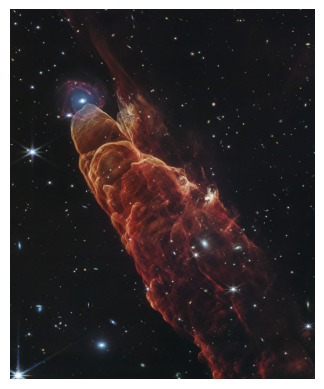

In [3]:
# Bild anzeigen (optional)
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
# Pixelwert der oberen linken Ecke auslesen
pixel_value = img.getpixel((0, 0))
print(f"Pixelwert der oberen linken Ecke: {pixel_value}")

Pixelwert der oberen linken Ecke: (27, 26, 26)


In [5]:
#Die Bildgrösse ausgeben.
width, height = img.size
print(f"Breite des Bildes: {width}")
print(f"Höhe des Bildes: {height}")

Breite des Bildes: 4152
Höhe des Bildes: 5044


In [6]:
# Einzelne Farbkanäle extrahieren
r, g, b = img.getpixel((0, 0))
print(f"Rotanteil: {r}, Grünanteil: {g}, Blauanteil: {b}")

Rotanteil: 27, Grünanteil: 26, Blauanteil: 26


**Erläuterung:**

1.  **Bild herunterladen:**
    * Wir verwenden `requests.get()`, um das Bild von der angegebenen URL herunterzuladen.
    * `BytesIO` wird verwendet, um die heruntergeladenen Daten in ein für PIL lesbares Format umzuwandeln.
2.  **Bild öffnen:**
    * `PIL.Image.open()` öffnet das Bild.
3.  **Bild anzeigen (optional):**
    * `matplotlib.pyplot.imshow()` zeigt das Bild an.
    * `plt.axis('off')` blendet die Achsen aus.
    * `plt.show()` zeigt das Bild an.
4.  **Pixelwert auslesen:**
    * `img.getpixel((0, 0))` gibt den Pixelwert an der Koordinate (0, 0) zurück, was der oberen linken Ecke des Bildes entspricht.
    * Der Pixelwert wird ausgegeben.
5.  **Bilddimensionen ausgeben:**
    * `img.size` gibt ein Tupel mit Breite und Höhe des Bildes zurück.
6.  **Farbkanäle auslesen:**
    * Bei Farbbildern enthält der Pixelwert Informationen zu den einzelnen Farbkanälen (Rot, Grün, Blau).
    * Diese können einzeln ausgelesen werden.

In [7]:
# URL zum JWST-Rohdatenbild (Beispiel, kann variieren)
image_url = "https://mast.stsci.edu/api/v0.1/Download/file/?missions=JWST&exptime=&obs_id=JWST-ERS-1324-001&instrument=NIRCam&proposal_id=1324&productFilename=jw01324001001_01101_00001_nrca1_uncal.fits"

# Daten herunterladen
response = requests.get(image_url)
fits_file = fits.open(BytesIO(response.content))

# Bilddaten extrahieren
image_data = fits_file[1].data  # Annahme: Bilddaten befinden sich in der ersten Erweiterung
fits_file.close()

# Bildvisualisierung
plt.figure(figsize=(10, 8))
plt.imshow(image_data, cmap='gray', origin='lower', vmin=np.percentile(image_data, 5), vmax=np.percentile(image_data, 95)) # Die vmin und vmax Werte stellen sicher, dass Outlier nicht zu stark ins Gewicht fallen.
plt.colorbar()
plt.title("JWST Rohbild")
plt.show()

# Ausgabe der Bild Dimensionen
print("Bild Dimensionen:", image_data.shape)

OSError: No SIMPLE card found, this file does not appear to be a valid FITS file. If this is really a FITS file, try with ignore_missing_simple=True

**Erklärungen:**

1.  **URL zum Bild:**
    * Wir verwenden eine Beispiel-URL von MAST, dem Mikulski Archive for Space Telescopes. Sie können andere JWST-Rohdaten-URLs aus dem MAST-Archiv verwenden.
2.  **Daten herunterladen:**
    * Mit `requests.get()` laden wir die FITS-Datei herunter.
    * `BytesIO` wandelt die heruntergeladenen Daten in ein Dateiobjekt im Arbeitsspeicher um, das von `astropy.io.fits.open()` verarbeitet werden kann.
3.  **Bilddaten extrahieren:**
    * `fits.open()` öffnet die FITS-Datei.
    * Rohdaten sind oft in der ersten Erweiterung der FITS-Datei gespeichert (Index 1). `fits_file[1].data` extrahiert die Bilddaten als NumPy-Array.
    * `fits_file.close()` schließt die Datei.
4.  **Bildvisualisierung:**
    * `matplotlib.pyplot.imshow()` zeigt die Bilddaten an.
    * `cmap='gray'` stellt sicher, dass das Bild in Graustufen angezeigt wird.
    * `origin='lower'` stellt den Ursprung der Achsen in die untere linke Ecke.
    * Die `vmin` und `vmax` Werte der anzuzeigenden Farben, werden an den 5 bzw. 95 percentil des Bildes gesetzt, um sicherzustellen, dass ausreisser in den Pixelwerten die Bilddarstellung nicht zu stark beeinflussen.
    * `plt.colorbar()` fügt eine Farbleiste hinzu.
    * `plt.title()` setzt den Titel des Diagramms.
    * `plt.show()` zeigt das Bild an.
5.  **Bild Dimensionen:**
    * Das Tupel `image_data.shape` wird ausgegeben und enthält die Dimensionen des Bildes.